# CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING)
---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='400px' heith='300px'>

# A| Phân loại (Classification)

## I) THUẬT TOÁN KNN
---
Bản chất, KNN là thuật toán đi tìm đầu ra cuả một điểm dữ liệu mới bằng cách chỉ dựa trên thông tin của K điểm dữ liệu trong tập huấn luyện gần nó nhất (K-lân cận)

<img src='pic/knn.png' width='300px'>

**Xác định người láng giềng gần nhất:**
<img src='pic/knn1.png' width='400px'>

**Tính khoảng cách giữa 2 điểm A-B:**
<img src='pic/distance1_knn.png' width='500px'>
<img src='pic/distance2_knn.png' width='500px'>

Ưu điểm:
* Độ phức tạp tính toán trong quá trình huấn luyện bằng 0
* Việc dự đoán kết quả của dữ liệu mới rất đơn giản
* Không cần giả sử gì về phân phối của các class

Nhược điểm:
* KNN rất nhạy với nhiễu khi K nhỏ.
* Tính toán khoảng cách tới từng điểm dữ liệu trong trong tập huấn luyện tốn rất nhiều thời gian, đặc biệt với các CSDL có số chiều lớn và có nhiều điểm dữ liệu. K càng lớn thì độ phức tạp càng tăng.
* Lưu toàn bộ dữ liệu trong bộ nhớ ảnh hưởng tới hiệu năng của KNN

## VÍ DỤ THỰC HÀNH 1:
## PHÂN LOẠI HOA LAN VỚI THUẬT TOÁN KNN
---
Tập dữ liệu bao gồm 150 mẫu về thông số chiều rộng, chiều dài của lá hóa và cánh hoa của 3 loại hoa Lan được gán nhãn:
* 0 - Setosa (50 mẫu)
* 1 - Vericolor (50 mẫu)
* 2 - Virginica (50 mẫu)

<img src='pic/iris.png' width='400px'>

### Đọc dữ liệu mẫu từ Dataset của Sklearn vào 2 biến
* X_iris: chứa các feature đầu vào (input)
* y_iris: chứa label đầu ra (target)

In [6]:
#Đọc tập dữ liệu Iris Dataset
import sklearn.datasets as datask
#Đọc dữ liệu trả về biến array
X_iris, y_iris = datask.load_iris(return_X_y=True)

print(type(X_iris))
print('Kích thước dữ liệu đầu vào (features):', X_iris.shape)
print('Kích thước dữ liệu đầu ra (target)   :', y_iris.shape)
print('Bộ dữ liệu 1)  ', X_iris[1,:], '--',y_iris[1])
print('Bộ dữ liệu 55) ', X_iris[55,:], '--',y_iris[55])
print('Bộ dữ liệu 111)', X_iris[111,:], '--',y_iris[111])

<class 'numpy.ndarray'>
Kích thước dữ liệu đầu vào (features): (150, 4)
Kích thước dữ liệu đầu ra (target)   : (150,)
Bộ dữ liệu 1)   [4.9 3.  1.4 0.2] -- 0
Bộ dữ liệu 55)  [5.7 2.8 4.5 1.3] -- 1
Bộ dữ liệu 111) [6.4 2.7 5.3 1.9] -- 2


In [8]:
import pandas as pd
import sklearn.datasets as datask
data_iris = datask.load_iris(as_frame=True)
df_iris = pd.concat([data_iris.data,data_iris.target],axis =1)
print(type(df_iris))
df_iris

<class 'pandas.core.frame.DataFrame'>


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Tách tập dữ liệu ra làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (60% - 40%)
---

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.4, random_state=50)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 90
2. Kích thước tập Test    : 60


### Sử dụng mô hình KNN cho bài toán phân lớp
---

In [12]:
#Khai báo sử dụng thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN trường hợp đơn giản K=1
KNN = KNeighborsClassifier(n_neighbors=1,p=2)
#Thực hiện huấn luyện với dữ liệu tập train
KNN.fit(X_train,y_train)
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN.predict(X_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [1 2 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2 2 1 1 2 0 0 1
 1 1 0 0 1 2 0 2 0 0 0 2 2 1 0 0 1 2 1 1 0 0 2]
Ground truth    :  [1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2 2 1 1 2 0 0 1
 2 1 0 0 1 2 0 2 0 0 0 2 2 1 0 0 1 2 1 1 0 0 2]


*Kết quả cho thấy nhãn dự đoán gần giống với nhãn thật của trên tập dữ liệu kiểm thử, chỉ có 2 mẫu trong số 60 mẫu trong tập Test có kết quả sai lệch. Ở đây chúng ta làm quen với khái niệm mới: ground truth. Một cách đơn giản, ground truth chính là nhãn/label/đầu ra thực sự của các điểm trong test data.*

**Để đánh giá độ chính xác của thuật toán KNN, chúng ta xem xem có bao nhiêu điểm trong tập kiểm thử được dự đoán đúng. Lấy số lượng này chia cho tổng số lượng trong tập test data sẽ ra độ chính xác.** 

In [13]:
from sklearn.metrics import accuracy_score
print("Độ chính xác với K=1 đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Độ chính xác với K=1 đạt: 96.67 %


In [14]:
# Thay đổi số lượng điểm lân cận K=11 (K nên chọn là số lẻ)
KNN = KNeighborsClassifier(n_neighbors=15)
#Thực hiện huấn luyện với dữ liệu tập train
KNN.fit(X_train,y_train)
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN.predict(X_test)
print("Độ chính xác với K=11 đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Độ chính xác với K=11 đạt: 95.00 %


**Khi tăng số điểm lân cận để thực hiện phân lớp lên 11, độ chính xác tăng lên 98.33% (chỉ có một dự đoán sai trong tổng số 60 mẫu của tập test)** 

**Đánh trọng số cho các điểm lân cận**
* Trong kỹ thuật major voting bên trên, mỗi trong 11 điểm gần nhất được coi là có vai trò như nhau và giá trị lá phiếu của mỗi điểm này là như nhau. Trong thực tế ta thấy rằng những điểm gần hơn nên có trọng số cao hơn (càng thân cận thì càng tin tưởng). Vậy nên sẽ đánh trọng số khác nhau cho mỗi trong 11 điểm gần nhất này. Cách đánh trọng số phải thoải mãn điều kiện là một điểm càng gần điểm test data thì phải được đánh trọng số càng cao (tin tưởng hơn).

* Scikit-learn giúp chúng ta đơn giản hóa việc này bằng cách gán gía trị weights = 'distance'. (Giá trị mặc định của weights là 'uniform', tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau như ở trên).

In [120]:
# Đánh trọng số cho điểm lân cận
KNN = KNeighborsClassifier(n_neighbors=11, p=2, weights='distance')
#Thực hiện huấn luyện với dữ liệu tập train
KNN.fit(X_train,y_train)
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN.predict(X_test)
print("Độ chính xác với K=11, có đánh trọng số các điểm lân cận đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Độ chính xác với K=11, có đánh trọng số các điểm lân cận đạt: 96.67 %


# THỰC HÀNH: THUẬT TOÁN KNN
---
Sử dụng thuật toán KNN phân loại rượu dựa vào các thống số liên quan

* Tìm hiểu tập dữ liệu mẫu "Wine recognition dataset" của Sklearn
    - Các biến độc lập (input - features)
    - Biến phụ thuộc  (label - target)
<img src='pic/win1.png' width='250px'>
* Áp dụng thuật toán KNN để phân loại rượu
    - Tách tập dữ liệu theo tỷ lệ 75% cho tập huấn luyện - 25% cho tập kiểm tra
    - Sử dụng thuật toán KNN với các trường hợp: K=1, 5, 7, 11 cho biết độ chính xác ứng với từng K đó trên tập Test.
    - Áp dụng thuật toán KNN với k=9 và có đánh trọng số các điểm lân cận. cho biết độ chính xác của thuật toán trên tập Test.

In [15]:
#{Sinh viên viết code ở đây!}
#Đọc tập dữ liệu Iris Dataset
import sklearn.datasets as datask
#Đọc dữ liệu trả về biến array
X_wine, y_wine = datask.load_wine(return_X_y=True)

print(type(X_iris))
print('Kích thước dữ liệu đầu vào (features):', X_wine.shape)
print('Kích thước dữ liệu đầu ra (target)   :', y_wine.shape)
print('Bộ dữ liệu 1)  ', X_wine[1,:], '--',y_wine[1])
print('Bộ dữ liệu 55) ', X_wine[55,:], '--',y_wine[55])
print('Bộ dữ liệu 111)', X_wine[111,:], '--',y_wine[111])



<class 'numpy.ndarray'>
Kích thước dữ liệu đầu vào (features): (178, 13)
Kích thước dữ liệu đầu ra (target)   : (178,)
Bộ dữ liệu 1)   [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03] -- 0
Bộ dữ liệu 55)  [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
 2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03] -- 0
Bộ dữ liệu 111) [1.252e+01 2.430e+00 2.170e+00 2.100e+01 8.800e+01 2.550e+00 2.270e+00
 2.600e-01 1.220e+00 2.000e+00 9.000e-01 2.780e+00 3.250e+02] -- 1


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.25, random_state=42)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 133
2. Kích thước tập Test    : 45


In [20]:
#Khai báo sử dụng thuật toán KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Khai báo model KNN trường hợp đơn giản K=1
KNN = KNeighborsClassifier(n_neighbors=1,p=2)
#Thực hiện huấn luyện với dữ liệu tập train
KNN.fit(X_train,y_train)
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)
print("Độ chính xác với K=1 đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [2 0 2 0 1 0 1 2 0 0 2 1 0 1 0 1 1 1 0 1 0 1 0 2 1 2 1 0 1 0 0 1 2 0 0 0 2
 2 2 2 0 1 1 2 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Độ chính xác với K=1 đạt: 77.78 %


In [21]:
#Khai báo model KNN trường hợp đơn giản K=5
KNN = KNeighborsClassifier(n_neighbors=5,p=2)
#Thực hiện huấn luyện với dữ liệu tập train
KNN.fit(X_train,y_train)
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)
print("Độ chính xác với K=5 đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [2 0 2 0 1 0 2 2 1 0 2 2 0 1 0 1 1 1 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0 2
 2 2 1 0 1 1 0 1]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Độ chính xác với K=5 đạt: 71.11 %


In [22]:
#Khai báo model KNN trường hợp đơn giản K=7
KNN = KNeighborsClassifier(n_neighbors=7,p=2)
#Thực hiện huấn luyện với dữ liệu tập train
KNN.fit(X_train,y_train)
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)
print("Độ chính xác với K=7 đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [0 0 2 0 1 0 1 2 2 0 2 2 0 1 0 1 1 2 0 1 0 1 2 1 1 1 1 2 1 0 0 1 2 0 0 0 2
 2 2 1 0 1 1 0 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Độ chính xác với K=7 đạt: 73.33 %


In [23]:
#Khai báo model KNN trường hợp đơn giản K=11
KNN = KNeighborsClassifier(n_neighbors=11,p=2)
#Thực hiện huấn luyện với dữ liệu tập train
KNN.fit(X_train,y_train)
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)
print("Độ chính xác với K=11 đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [0 0 1 0 1 0 2 0 2 0 0 2 0 1 0 1 1 2 0 1 0 1 2 2 1 2 1 2 1 0 0 1 0 0 0 0 2
 1 2 2 0 1 1 0 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Độ chính xác với K=11 đạt: 71.11 %


In [25]:
#Khai báo model KNN trường hợp đơn giản K=9
KNN = KNeighborsClassifier(n_neighbors=9,p=2,weights='distance')
#Thực hiện huấn luyện với dữ liệu tập train
KNN.fit(X_train,y_train)
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test
y_pred = KNN.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)
print("Độ chính xác với K=9 co đánh trọng số các điểm lân cận đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [2 0 2 0 1 0 1 2 2 0 2 1 0 1 0 1 1 1 0 1 0 1 2 2 1 2 1 2 1 0 0 1 2 0 0 0 2
 2 2 2 0 1 1 2 2]
Ground truth    :  [0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0 2
 2 1 2 0 1 1 1 2]
Độ chính xác với K=9 co đánh trọng số các điểm lân cận đạt: 77.78 %


# II. THUẬT TOÁN CÂY QUYẾT ĐỊNH (DECISION TREE)
---
* Việc quan sát, suy nghĩ và ra các quyết định của con người thường được bắt đầu từ các câu hỏi. Machine learning cũng có một mô hình ra quyết định dựa trên các câu hỏi. Mô hình này có tên là cây quyết định (decision tree).

* Decision tree là một mô hình học có giám sát, có thể được áp dụng vào cả hai bài toán classification và regression. 

<img src='pic/decisiontree.png' width='400px'>

* Dùng cấu trúc cây để đưa ra một hàm phân lớp cần học (hàm mục tiêu có giá trị rời rạc)
* Một cây quyết định có thể được biểu diễn (diễn giải) bằng một tập các luật IF-THEN (dễ đọc và dễ hiểu)
* Được áp dụng thành công trong rất nhiều các bài toán ứng dụng thực tế

**Các độ đo lựa chọn thuộc tính:**
* Một độ đo lựa chọn thuộc tính là một phương pháp tiên nghiệm (heuristic) để lựa chọn tiêu chí phân chia để phân tách tốt nhất phần dữ liệu D đã cho
* Một cách lý tưởng
    - Mỗi phần được chia ra nên thuần nhất
    - Mỗi phần thuần nhất là phần chứa các mẫu cùng thuộc một lớp
* Các độ đo phân chia thuộc tính (các luật phân chia)
    - Xác định các mẫu ở một node được phân chia thế nào
    - Đưa ra cách xếp hạng các thuộc tính
    - Thuộc tính với điểm cao nhất được lựa chọn
    - Xác định một điểm phân chia hoặc một tập con phân chia
* Các phương pháp
    - Information gain
    - Gain ratio
    - Gini Index
    
**NHẬN XÉT CÂY QUYẾT ĐỊNH:**
* Cây quyết định có tốc độ học tương đối nhanh so với các phương pháp khác
* Đơn giản và dễ hiểu các luật phân loại trong cây ra quyết định
* Information Gain, Gain Ratio, và Gini Index là những phương pháp lựa chọn thuộc tính thông dụng nhất
* Cắt tỉa cây là cần thiết để loại bỏ những nhánh không tin cậy

### Một số vấn đê về xây dựng cây
---
Gốc của cây chứa tất cả dữ liệu, các node trung gian, các node lá.
- Các node được chia nhị phân: 
    - Chọn một thuộc tính $X_i$
    - Chọn một điểm chia $t_j$

- Độ sâu của cây?
- Số mẫu trong mỗi node lá?
- Số node lá lớn nhất?

**Root node (Nút gốc)**: Chứa toàn bộ dữ liệu mẫu. Dữ liệu này được chia thành các nhóm nhỏ hơn

**Splitting (Phân nhóm)**: Là quá trình chia các nhóm thành các nhóm nhỏ hơn

**Decision node (Nút quyết định)**: Là các nút tiếp tục được phân chia

**Leaf node (Nút lá)**: Là các nút không được phân chia

**Prunning (Tỉa cành)**: Loại bỏ một số nút phụ của cây

**Sub-Tree (nhánh)**: Là một bộ phận của cây

**Parent and Child node (Nút cha và nút con)**: Nút bị chia thành các nút phụ gọi là nút cha, các nút phụ của nút cha gọi là nút con

### Ưu và nhược điểm của cây quyết định

- **Ưu điểm:**
    - Dễ hiểu: Cây biểu diễn trực quan
    - Hữu ích: Xác định được các biến quan trọng
    - Phi tham số: không cần giả định về phân phối
    - Không phục thuộc vào dữ liệu: Có thể áp dụng cả dữ liệu phân loại và liên tục
- **Nhược điểm:**
    - Dễ bị quá khớp (overfitting)

## Phân loại dựa trên cây quyết định
- Cho dữ liệu $(x_i,y_i)$ với $y_i\in \{1,2,\dots,K\}$ chia thành $K$ nhóm.
- Với mỗi nút $m$ biểu diễn bởi miền $R_m$ với $N_m$ quan sát. Ta tính $p_{mk}$ là tỷ lệ các quan sát thuộc nhóm $k$ tại nút $m$: $$p_{mk}=\dfrac{1}{N_m}\sum\limits_{x_i\in R_m}I_{[y_i=k]} $$
- Nút $m$ phân loại thành nhóm có tỷ lệ cao nhất $$k(m)=\arg\max_k \{p_{mk}\}$$

**Độ đo đồng nhất cho mỗi nút**
- Với mỗi nút $m$ ta đo độ đồng nhất của mỗi nút
    - Xác suất phân loại sai (missclassification error): $$Q_m=\dfrac{1}{N_m}\sum\limits_{x_i\in R_m}I_{[y_i\ne k]}=1-p_{kk(m)}  $$
    - Chỉ số Gini: $$Q_m=\sum\limits_{k\ne l} p_{mk}p_{ml}=\sum\limits_{k=1}^K p_{mk}(1-p_{mk})=1-\sum\limits_{k=1}^K p^2_{mk} $$
    - Entropy chéo (cross-entropy): $$ Q_m=-\sum\limits_{k=1}^K p_{mk}\log p_{mk}$$

**Thuật toán:**
- Với mỗi nút ( không phải nút lá):
    - Với mỗi biến $X_k$:
        - Tìm điểm cắt tối ưu $s$ $$s=\arg\min_s \big[Q(X_k,s)=Q(x_{ik}\le s)+Q(x_{ik}> s)\big], $$  
    - Chọn biến $X_k$ và $s$ với $Q(X_k,s)$ bé nhất
- Lặp đến khi đạt đến điều kiện dừng

## VÍ DỤ THỰC HÀNH 2: 
## XÂY DỰNG MÔ HÌNH HỌC MÁY VỚI THUẬT TOÁN DECISION TREE
---

### Đọc dữ liệu mẫu từ Dataset của Sklearn vào 2 biến
* X_iris: chứa các feature đầu vào (input)
* y_iris: chứa label đầu ra (target)

In [6]:
#Đọc dữ liệu mẫu Iris từ sklearn
#Đọc tập dữ liệu Iris Dataset
import sklearn.datasets as datask
#Đọc dữ liệu trả về biến array
X_iris, y_iris = datask.load_iris(return_X_y=True)

print(type(X_iris))
print('Kích thước dữ liệu đầu vào (features):', X_iris.shape)
print('Kích thước dữ liệu đầu ra (target)   :', y_iris.shape)
print('Bộ dữ liệu 1)  ', X_iris[1,:], '--',y_iris[1])
print('Bộ dữ liệu 55) ', X_iris[55,:], '--',y_iris[55])
print('Bộ dữ liệu 111)', X_iris[111,:], '--',y_iris[111])

<class 'numpy.ndarray'>
Kích thước dữ liệu đầu vào (features): (150, 4)
Kích thước dữ liệu đầu ra (target)   : (150,)
Bộ dữ liệu 1)   [4.9 3.  1.4 0.2] -- 0
Bộ dữ liệu 55)  [5.7 2.8 4.5 1.3] -- 1
Bộ dữ liệu 111) [6.4 2.7 5.3 1.9] -- 2


### Tách tập dữ liệu ra làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (80% - 20%)
---

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, 
                                                    test_size=0.2, 
                                                    random_state=50)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 120
2. Kích thước tập Test    : 30


## Sử dụng thuật toán Decision Tree trong thư viện Sklearn để phân lớp
---

In [8]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Xây dựng và huấn luyện với model: Decision Tree 
'''model_tree  = DecisionTreeClassifier(criterion= 'gini', 
                                     splitter='best', 
                                     random_state=0)
'''
#Thay đổi tham số:

model_tree  = DecisionTreeClassifier(criterion= 'entropy', 
                                     splitter='random', 
                                     random_state=0)


# Huấn luyên mô hình với dữ liệu huấn luyện
model_tree.fit(X_train, y_train)

print("Độ chính xác của tập huấn luyện:",model_tree.score(X_train, y_train))

Độ chính xác của tập huấn luyện: 1.0


**TRỰC QUAN HÓA CÂY QUYẾT ĐỊNH:**
* Để view được cây quyết định trên jupyter notebook cần cài đặt Graphviz và thư viện pydotplus
    - Hướng dẫn cài đặt Graphviz xem link:https://www.youtube.com/watch?v=z-AGmGmR6Z8&ab_channel=MachineLearningwithPython&fbclid=IwAR1eL2li4F5NmylVctjCSgdWAE1WvzQjPlChaGAa4lAyn1-Yi4QyjuoX_QQ
    - Cài đặt thư viện hỗ trợ hiển thị sơ đồ nếu chưa cài đặt (!pip install pydotplus)

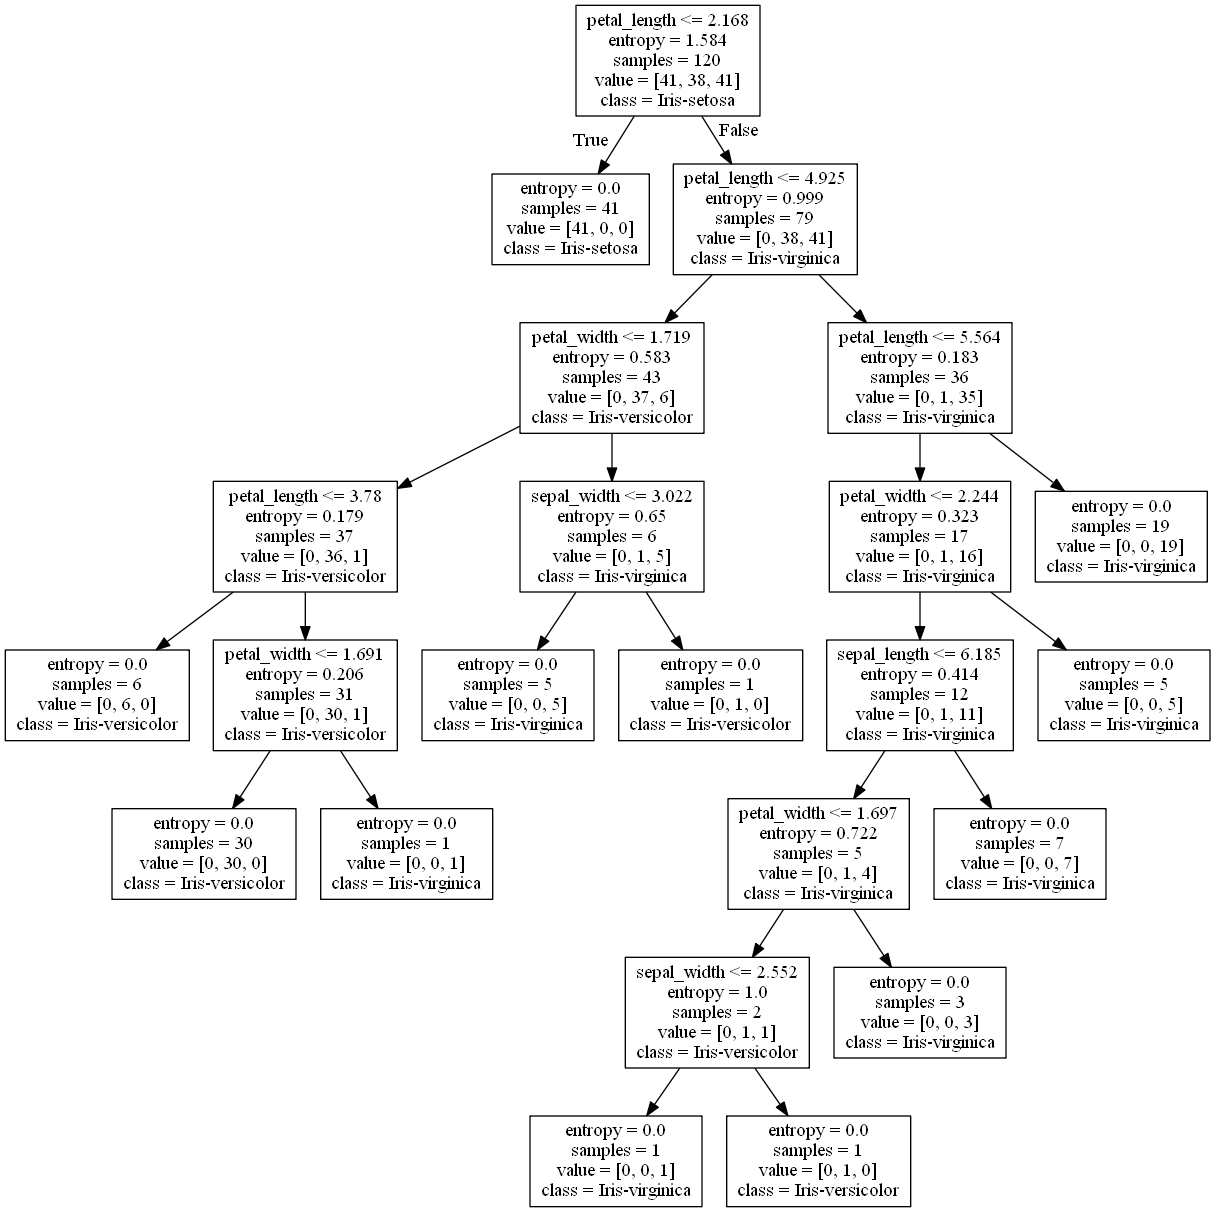

In [15]:
import pydotplus
from IPython.display import Image  
import numpy as np
from sklearn import tree
# Trực quan hóa dữ liệu huấn luyện
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                                feature_names=['sepal_length','sepal_width','petal_length','petal_width'],  
                                class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [9]:
#Phân loại hoa lan trên tập kiểm thử
y_pred = model_tree.predict(X_test)

print("Kết quả phân loại hoa lan trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

from sklearn.metrics import accuracy_score
print("Độ chính đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Kết quả phân loại hoa lan trên tập dữ liệu TEST:
Predicted labels:  [1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 2 2 1 0 2 1 2 1 1 1 2]
Ground truth    :  [1 1 0 0 2 2 2 0 0 1 0 2 0 2 1 0 1 0 1 1 2 1 0 2 1 2 1 1 1 2]
Độ chính đạt: 96.67 %


[0.00713445 0.03103923 0.84061141 0.1212149 ]


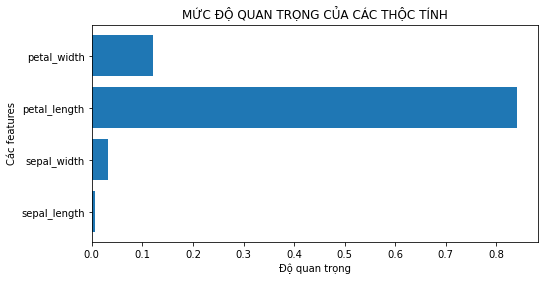

In [10]:
#Xác định mức độ quan trọng của các feature
print(model_tree.feature_importances_)

#Trực quan hóa
import matplotlib.pyplot as plt
features=['sepal_length','sepal_width','petal_length','petal_width']
n = len(features)
plt.figure(figsize=(8,4))
plt.barh(range(n),model_tree.feature_importances_)
plt.yticks(range(n),features)
plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Các features')
plt.xlabel('Độ quan trọng')
plt.show()

In [11]:
# xác định độ sau của cây: khoảng cách tối đã giữa gốc
print('Độ sâu của cây quyết đinh: ',model_tree.get_depth())

Độ sâu của cây quyết đinh:  7


In [12]:
#xác định số nút lá của cây quyết định
print('Số nút lá của cây quyết định: ', model_tree.get_n_leaves())

Số nút lá của cây quyết định:  12


In [13]:
#Danh sách các tham số model: Decesion tree
print('Danh sách các tham số: ', model_tree.get_params())

Danh sách các tham số:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'random'}


**Sử dụng model được huấn luyện dự đoán cho bộ dữ liệu mới**
- Thông số bộ dữ liệu mới:
<img src='pic/iris1.png' width='180px'>
- sepal length (cm)	-- sepal width (cm) --	petal length (cm) -- petal width (cm)
- (8.2 -----------------3.1-------------------3.9-------------------1.2)

In [26]:
X_new = np.array([(8.2,  3.1,  3.9, 1.2)])

print('Thông số mẫu hoa lan:', X_new)
#Xác định lớp của hoa dựa vào các thông số này trên model đã huấn luyện
y_new = model_tree.predict(X_new)
if y_new==0:
    print('Đây là hoa ',y_new,': Iris-setosa')
elif y_new==1:
    print('Đây là hoa ',y_new,': Iris-versicolor')
else:
    print('Đây là hoa ',y_new,': Iris-virginica')

Thông số mẫu hoa lan: [[8.2 3.1 3.9 1.2]]
Đây là hoa  [1] : Iris-versicolor


## Bài thực hành

In [1]:
# yêu cầu 1: Sinh viên tìm hiểu về tập dữ liệu mẫu wine trong Dataset của Sklearn (xác định các features và label)
#Đọc dữ liệu mẫu wine từ sklearn
#Đọc tập dữ liệu wine Dataset
import sklearn.datasets as datask
#Đọc dữ liệu trả về biến array
X_wine, y_wine = datask.load_wine(return_X_y=True)

print(type(X_wine))
print('Kích thước dữ liệu đầu vào (features):', X_wine.shape)
print('Kích thước dữ liệu đầu ra (target)   :', y_wine.shape)
print('Bộ dữ liệu 1)  ', X_wine[1,:], '--',y_wine[1])
print('Bộ dữ liệu 55) ', X_wine[55,:], '--',y_wine[55])
print('Bộ dữ liệu 111)', X_wine[111,:], '--',y_wine[111])

<class 'numpy.ndarray'>
Kích thước dữ liệu đầu vào (features): (178, 13)
Kích thước dữ liệu đầu ra (target)   : (178,)
Bộ dữ liệu 1)   [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03] -- 0
Bộ dữ liệu 55)  [1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
 2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03] -- 0
Bộ dữ liệu 111) [1.252e+01 2.430e+00 2.170e+00 2.100e+01 8.800e+01 2.550e+00 2.270e+00
 2.600e-01 1.220e+00 2.000e+00 9.000e-01 2.780e+00 3.250e+02] -- 1


In [2]:
#yêu cầu 2: Tách tập dữ liệu data_wine thành 2 phần train – test theo tỷ lệ 75% - 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, 
                                                    test_size=0.25, 
                                                    random_state=50)

print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 133
2. Kích thước tập Test    : 45


### Yêu cầu 3:
- Sử dụng thuật toán Cây quyết định trong 2 trường hợp:
    - Sử dụng độ đo Entropy: Trực quan hóa cây quyết định thu được trên tập Huấn luyện, xác định thuộc tính quan trọng và vẽ biểu đồ; xác định độ chính xác của mô hình trên tập Test.
    - Sử dụng độ đo Gini: Trực quan hóa cây quyết định thu được trên tập
Huấn luyện, xác định thuộc tính quan trọng và vẽ biểu đồ; xác định độ
chính xác của mô hình trên tập Test.


In [3]:
#Gọi thư viên thuật toán DecisionTree
from sklearn.tree import DecisionTreeClassifier

#Xây dựng và huấn luyện với model: Decision Tree 
'''model_tree  = DecisionTreeClassifier(criterion= 'gini', 
                                     splitter='best', 
                                     random_state=0)
'''
#Thay đổi tham số:

model_tree  = DecisionTreeClassifier(criterion= 'entropy', 
                                     splitter='random', 
                                     random_state=0)


# Huấn luyên mô hình với dữ liệu huấn luyện
model_tree.fit(X_train, y_train)

print("Độ chính xác của tập huấn luyện:",model_tree.score(X_train, y_train))

Độ chính xác của tập huấn luyện: 1.0


In [13]:
#Phân loại rượu trên tập kiểm thử
y_pred = model_tree.predict(X_test)

print("Kết quả phân loại rượu trên tập dữ liệu TEST:")
print("Predicted labels: ", y_pred)
print("Ground truth    : ", y_test)

from sklearn.metrics import accuracy_score
print("Độ chính xác đạt: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

Kết quả phân loại rượu trên tập dữ liệu TEST:
Predicted labels:  [1 1 1 2 2 2 1 1 0 2 0 0 1 0 1 2 1 1 0 0 0 1 0 2 0 0 1 1 0 1 0 0 2 2 0 1 0
 1 0 0 1 1 1 2 1]
Ground truth    :  [1 1 1 2 2 2 1 1 0 2 0 0 1 0 1 2 1 2 1 0 0 1 0 2 0 0 1 1 0 1 0 0 2 2 0 1 1
 2 0 0 1 1 1 2 1]
Độ chính xác đạt: 91.11 %


[0.         0.00689611 0.         0.         0.08267661 0.
 0.46628157 0.         0.         0.05184825 0.11672218 0.03107858
 0.2444967 ]


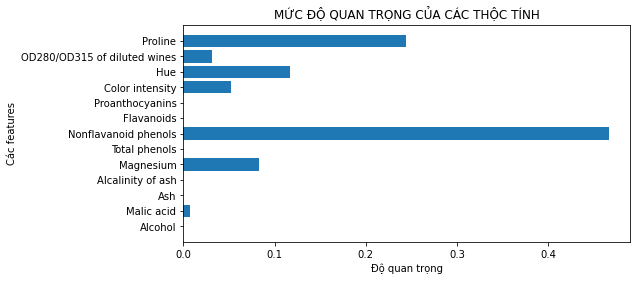

In [12]:
#Xác định mức độ quan trọng của các feature
print(model_tree.feature_importances_)

#Trực quan hóa
import matplotlib.pyplot as plt
features=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Nonflavanoid phenols',
          'Flavanoids','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
n = len(features)
plt.figure(figsize=(8,4))
plt.barh(range(n),model_tree.feature_importances_)
plt.yticks(range(n),features)
plt.title('MỨC ĐỘ QUAN TRỌNG CỦA CÁC THỘC TÍNH')
plt.ylabel('Các features')
plt.xlabel('Độ quan trọng')
plt.show()

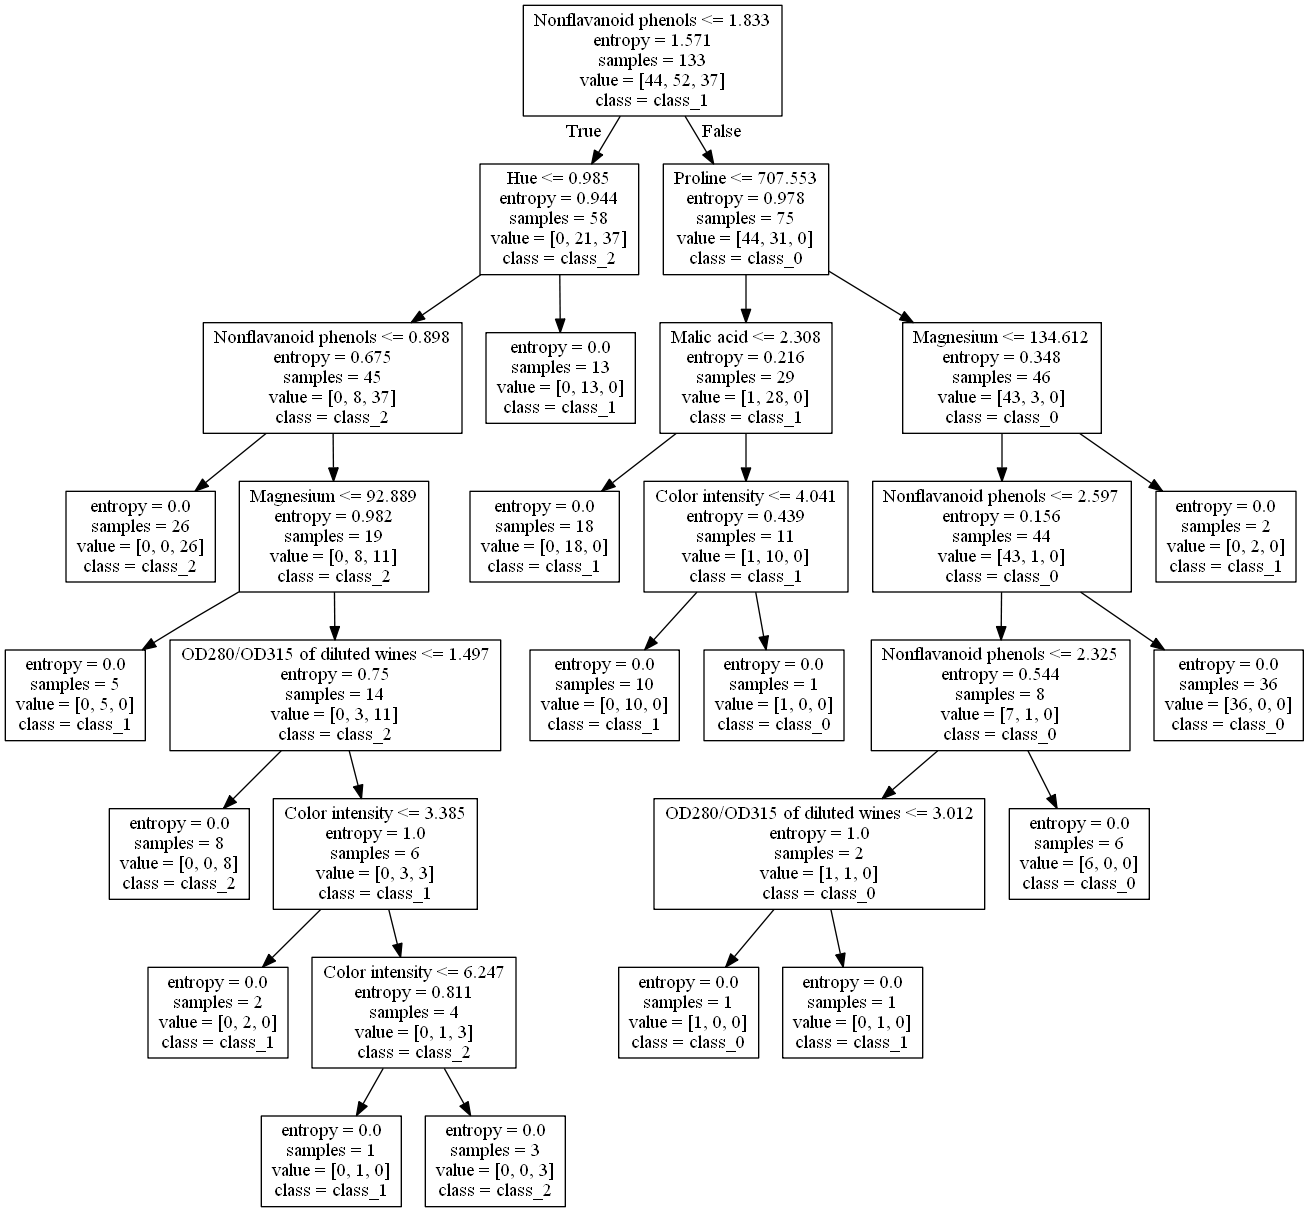

In [14]:
import pydotplus
from IPython.display import Image  
import numpy as np
from sklearn import tree
# Trực quan hóa dữ liệu huấn luyện
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                                feature_names=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Nonflavanoid phenols',
          'Flavanoids','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'],  
                                class_names=['class_0','class_1','class_2'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### yêu cầu 4: Sử dụng model huấn luyện được cho biết mẫu rượu này thuộc loại nào?

In [15]:
X_new = np.array([(12.7, 3.05,  1.88, 28.8, 101.1, 2.88, 3.88, 0.44, 2.88, 8.8, 1.48, 3.88, 888)])

print('Thông số mẫu rượu:', X_new)
#Xác định lớp của hoa dựa vào các thông số này trên model đã huấn luyện
y_new = model_tree.predict(X_new)
if y_new==0:
    print('Đây là rượu ',y_new,': Alcohol')
elif y_new==1:
    print('Đây là rượu ',y_new,': Malic acid')
elif y_new==2:
    print('Đây là rượu ',y_new,': Ash')
elif y_new==3:
    print('Đây là rượu ',y_new,': Alcalinity of ash')
elif y_new==4:
    print('Đây là rượu ',y_new,': Magnesium')
elif y_new==5:
    print('Đây là rượu ',y_new,': Total phenols')
elif y_new==6:
    print('Đây là rượu ',y_new,': Nonflavanoid phenols')
elif y_new==7:
    print('Đây là rượu ',y_new,': Flavanoids')
elif y_new==8:
    print('Đây là rượu ',y_new,': Proanthocyanins')
elif y_new==9:
    print('Đây là rượu ',y_new,': Color intensity')
elif y_new==10:
    print('Đây là rượu ',y_new,': Hue')
elif y_new==11:
    print('Đây là rượu ',y_new,': OD280/OD315 of diluted wines')
else:
    print('Đây là rượu ',y_new,': Proline')

Thông số mẫu rượu: [[1.270e+01 3.050e+00 1.880e+00 2.880e+01 1.011e+02 2.880e+00 3.880e+00
  4.400e-01 2.880e+00 8.800e+00 1.480e+00 3.880e+00 8.880e+02]]
Đây là rượu  [0] : Alcohol
